In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [474]:
mnist = load_digits(as_frame = True)


In [475]:
X = mnist.data
y = mnist.target

In [476]:
X.shape

(1797, 64)

In [477]:
y.shape

(1797,)

In [478]:
# 將資料集轉為DataFrame以方便處理
df = pd.DataFrame(X, columns=mnist.feature_names)
df['species'] = y
print(df)
# 檢查資料集是否平衡
print("原始資料集類別數量：")
print(df['species'].value_counts())

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0      

In [479]:
y.shape

(1797,)

In [480]:
df.shape

(1797, 65)

In [481]:
df.info(verbose=True)
df.columns
df.index
df.head(3)
df.loc[10 : 16,'pixel_0_3']
df['pixel_0_3'] > 1
df[df['pixel_0_3'] > 1]
df.isna()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
species      0
Length: 65, dtype: int64

In [482]:
y.shape

(1797,)

In [483]:
# 計算每個分類的樣本數量
unique, counts = np.unique(y, return_counts=True)
print(f"資料集一共有{len(unique)}類")

資料集一共有10類


In [484]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [485]:
counts

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

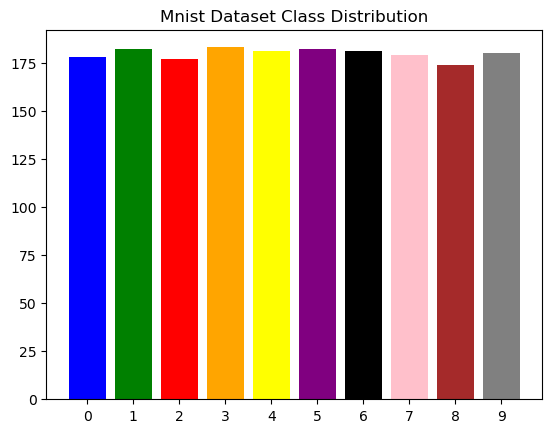

In [486]:
# 獲取數字名稱
species_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## 須完成部分(將每個類別的數量以長條圖的方式可視化)

colors =['blue','green','red','orange','yellow','purple','black','pink','brown','gray']

### 繪製長條圖
plt.bar(species_names,counts,color=colors)


### 添加標題和軸標籤
plt.title("Mnist Dataset Class Distribution")

### 顯示圖表
plt.show()

In [487]:
count_min=df['species'].value_counts().min()
### 依照最小類別的數量平衡每個類別的數量
df_same = df.groupby('species').apply(lambda x: x.sample(count_min)).reset_index(drop=True)
### 檢查平衡後的資料集類別數量
print(df_same['species'].value_counts())

species
0    174
1    174
2    174
3    174
4    174
5    174
6    174
7    174
8    174
9    174
Name: count, dtype: int64


/var/folders/rk/lr0blqfs77z4ycrn1d7px9n80000gn/T/ipykernel_6958/721453381.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_same = df.groupby('species').apply(lambda x: x.sample(count_min)).reset_index(drop=True)


In [488]:
df_same.shape

(1740, 65)

In [489]:
y=df_same['species']
X = df_same.drop('species', axis=1)


In [490]:
X.shape

(1740, 64)

In [491]:
unique, counts = np.unique(df_same['species'], return_counts=True)

In [492]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [493]:
counts.shape

(10,)

In [494]:
from sklearn.model_selection import train_test_split # 导入拆分数据集工具

### 定義訓練集比例
train_ratio = 0.7

### 初始化訓練集與測試集
X_train, X_test = pd.DataFrame(), pd.DataFrame()
y_train, y_test = pd.Series(dtype='int'), pd.Series(dtype='int')

### 對每個類別進行分割
X = df_same.drop('species', axis=1)  # 特徵數據（所有列，除了 'species'）
y = df_same['species']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_ratio, random_state=0, stratify=y)

In [495]:
print(y_train.value_counts())

species
2    53
8    53
5    52
0    52
4    52
1    52
6    52
9    52
3    52
7    52
Name: count, dtype: int64


In [496]:
unique, counts = np.unique(y_train, return_counts=True)

In [497]:
species_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

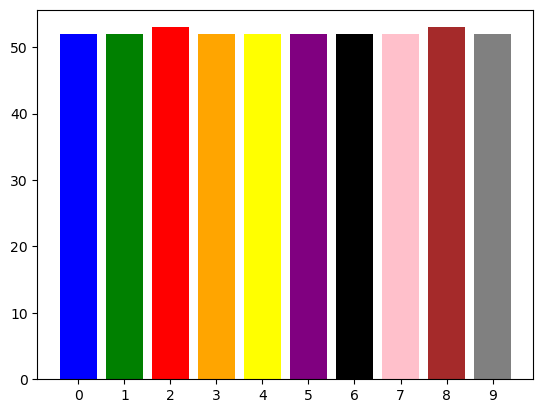

In [498]:
plt.bar(species_names,counts,color=colors)
plt.show()

In [499]:
unique, counts = np.unique(y_test, return_counts=True)

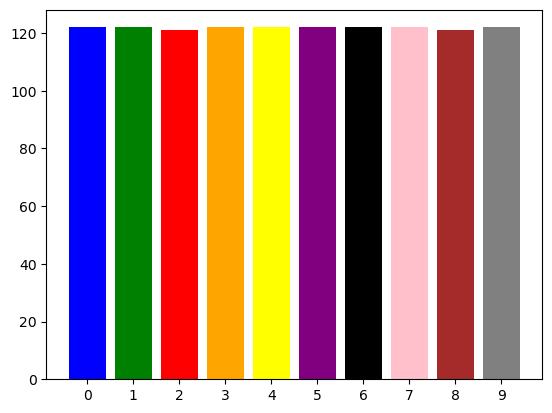

In [500]:
plt.bar(species_names,counts,color=colors)
plt.show()